# Problem Statement

Business problem overview: 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Understanding and defining churn:

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully. Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

In [54]:
#Importing Libraries
import pandas as pd
import numpy as np

#Imporitng Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Data Preparation and Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Miscellaneous Libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

# For Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# For clustering 
## using KMeans ##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_roc_curve

## using Hierarchical ##
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from datetime import date,datetime
import math
import multiprocessing

# Data Understanding

Reading the dataset

In [55]:
churn = pd.read_csv("C:\\Users\\Akansh\\Downloads\\telecom-churn-case-study-hackathon-c43 (1)\\train.csv")
churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [56]:
churn.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [57]:
#Lets check how the data is spread
churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [58]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [59]:
churn.shape

(69999, 172)

In [60]:
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

# Data cleaning

In [61]:
###Printing the null values
churn.isnull().sum()


id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [62]:
#checking the null value percentage
churn.isna().sum()/churn.isna().count()*100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [63]:
#Printing all the missing values greater than 50% and removing them to get few variables:
colls = []
for col in churn.columns:
    null_col = churn[col].isnull().sum() / churn.shape[0] * 100
    if null_col>50:
        colls+=[col]
        print("{} : {:.2f}".format(col,null_col))

date_of_last_rech_data_6 : 74.90
date_of_last_rech_data_7 : 74.48
date_of_last_rech_data_8 : 73.69
total_rech_data_6 : 74.90
total_rech_data_7 : 74.48
total_rech_data_8 : 73.69
max_rech_data_6 : 74.90
max_rech_data_7 : 74.48
max_rech_data_8 : 73.69
count_rech_2g_6 : 74.90
count_rech_2g_7 : 74.48
count_rech_2g_8 : 73.69
count_rech_3g_6 : 74.90
count_rech_3g_7 : 74.48
count_rech_3g_8 : 73.69
av_rech_amt_data_6 : 74.90
av_rech_amt_data_7 : 74.48
av_rech_amt_data_8 : 73.69
arpu_3g_6 : 74.90
arpu_3g_7 : 74.48
arpu_3g_8 : 73.69
arpu_2g_6 : 74.90
arpu_2g_7 : 74.48
arpu_2g_8 : 73.69
night_pck_user_6 : 74.90
night_pck_user_7 : 74.48
night_pck_user_8 : 73.69
fb_user_6 : 74.90
fb_user_7 : 74.48
fb_user_8 : 73.69


In [64]:
churn.shape

(69999, 172)

In [65]:
churn.drop_duplicates(subset=None, inplace = True)
churn.shape

(69999, 172)

In [66]:
churn.size

12039828

In [67]:
# creating a list of recharge column here we will impute missing values with zeroes.
zero_impute = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8']

#Imputing missing values with 0
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

#To check if the values are imputed correctly, we are checking 'Missing value ratio'
churn[zero_impute].isnull().sum()*100/churn.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [68]:
#Now we are checking the 'Statistics Summary'
churn[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,48.395787,51.415168,51.782975,31.748339,32.260075,32.986614
std,1.762010,1.943193,1.973434,126.923180,133.246541,131.291162,77.519536,78.069163,78.808337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,17.000000,23.000000,8.000000,14.000000,17.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000,1555.000000,1555.000000,1555.000000


In [69]:
#Creating some column name list by there types using description of columns
id_cols = ['id','circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

#Print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" %(len(id_cols),len(date_cols),len(num_cols),len(cat_cols)))

#To check if we have missed any column zero or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])


#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


In [70]:
# Dropping id and date columns
churn = churn.drop(id_cols + date_cols, axis=1)
#Check the shape again
churn.shape

(69999, 161)

In [71]:
# Replace missing values with '-1' in categoricl columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [72]:
#Missing value ratio
churn[cat_cols].isnull().sum()*100/churn.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

Dropping variables with more than 70% of missing values 

In [73]:
initial_cols = churn.shape[1]
Missing_Threshold = 0.7
include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < Missing_Threshold else False))
drop_missing = pd .DataFrame({'features':churn.columns, 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [74]:
#Dropping some more columns
churn = churn.loc[:, include_cols]
dropped_cols = churn.shape[1] - initial_cols
dropped_cols

-12

In [75]:
#Rechecking shape
churn.shape

(69999, 149)

In [76]:
#Rechecking the missing values
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        1.002871
std_og_t2o_mou        1.002871
loc_ic_t2o_mou        1.002871
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_m

In [77]:
percent_null = churn.isnull().sum().sum()/np.product(churn.shape)*100
percent_null

2.5665563199320873

In [78]:
num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [79]:
#Imputing with median for num_cols
churn[num_cols] = churn[num_cols].apply(lambda x: x.fillna(x.median()))

In [80]:
#Again checking for the missing values
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

#Assuming that there are three phases of customer lifecycle:
The Good and Action phase { month 6 & 7 }
The Churn phase { month 8 }

Filtering High Value customers [Considering good phase] data to get highvaluecustomers

In [81]:
#Calculate the total data rechargeamount for june and july > number of recharge * avverage recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

Add total data recharge and total recharge to get total combined recharge amount for a month

In [82]:
# Calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [83]:
# Calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [84]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [85]:
churn.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,0.0,0.0,77.0,65.0,71.0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,0.0,145.0,0.0,290.0,145.0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31

Filtering the date with more that 70th percentile amount

In [86]:
# Retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)

In [87]:
churn_filtered.shape

(21013, 154)

In [88]:
# Delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [89]:
churn_filtered.shape

(21013, 149)

Hear we're left with 21,013 rows and 149 columns after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

Derive churn means hear we are using 8 month(The ‘churn’ phase) data , To get the target variable(In this case stydy they did not provide any target variable we have to derive it from churn phase data) For that, we need to find the derive churn variable using total_ic_mou_8,total_og_mou_8,vol_2g_mb_8 and vol_3g_mb_8 attributes

In [90]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
churn_filtered[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21013 non-null  float64
 1   total_og_mou_8  21013 non-null  float64
 2   vol_2g_mb_8     21013 non-null  float64
 3   vol_3g_mb_8     21013 non-null  float64
dtypes: float64(4)
memory usage: 656.8 KB


0    27.534679
1     2.484321
Name: churn_probability, dtype: float64


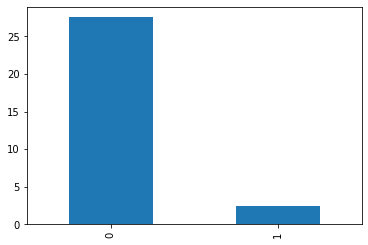

In [91]:
# lets find out churn/non churn percentage
print((churn_filtered['churn_probability'].value_counts()/len(churn))*100)
((churn_filtered['churn_probability'].value_counts()/len(churn))*100).plot(kind="bar")
plt.show()

90% of the customers do not churn, there is a possibility of class imbalance

Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _8) can be dropped form the dataset.We can still clean the data by few possible columns relating to the good phase.As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [92]:
churn_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

#We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.



In [93]:
# creating a list of column names for each month
mon_6_cols = [col for col in churn_filtered.columns if '_6' in col]
mon_7_cols = [col for col in churn_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_filtered.columns if '_8' in col]

In [94]:
mon_7_cols

['arpu_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'total_rech_num_7',
 'max_rech_amt_7',
 'last_day_rch_amt_7',
 'max_rech_data_7',
 'vol_2g_mb_7',
 'vol_3g_mb_7',
 'night_pck_user_7',
 'monthly_2g_7',
 'sachet_2g_7',
 'monthly_3g_7',
 'sachet_3g_7',
 'fb_user_7']

In [95]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = churn_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8               0.958953
fb_user_6           night_pck_user_6     0.957744
isd_og_mou_8        isd_og_mou_7         0.956635
fb_user_7           night_pck_user_7     0.955499
fb_user_8           night_pck_user_8     0.954382
isd_og_mou_7        isd_og_mou_6         0.936012
isd_og_mou_8        isd_og_mou_6         0.934200
total_ic_mou_6      loc_ic_mou_6         0.901348
total_ic_mou_8      loc_ic_mou_8         0.898511
sachet_2g_8         total_rech_data_8    0.897476
total_ic_mou_7      loc_ic_mou_7         0.883143
std_og_t2t_mou_7    onnet_mou_7          0.861786
std_og_t2t_mou_6    onnet_mou_6          0.860921
std_og_t2t_mou_8    onnet_mou_8          0.858635
std_og_t2m_mou_7    offnet_mou_7         0.857958
std_og_t2m_mou_8    offnet_mou_8         0.855066
total_og_mou_8      std_og_mou_8         0.850737
total_og_mou_7      std_og_mou_7         0.850341
loc_ic_mou_6        loc_ic_t2m_mou_6     0.846101
loc_og_mou_8        loc_og_mou_7         0.842607


In [96]:
#  columns can be dropped as they are highly 85%
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7','std_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7',]


#  dropping these column
churn_filtered.drop(col_to_drop, axis=1, inplace=True)

In [97]:
# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(21013, 135)

Column Reduced from 172 to 135

# Data preparation
# Deriving new variables to understand the data
# EDA

In [98]:
# Creating a new variable 'tenure'
churn_filtered['tenure'] = (churn_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn_filtered.drop('aon',axis=1, inplace=True)

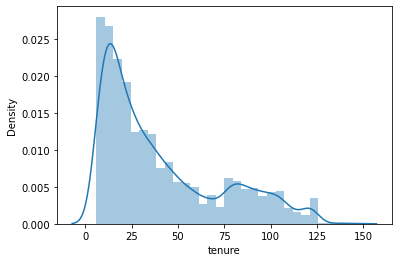

In [99]:
# Checking the distribution of he tenure variable

sns.distplot(churn_filtered['tenure'],bins=30)
plt.show()

In [100]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_filtered['tenure_range'] = pd.cut(churn_filtered['tenure'], tn_range, labels=tn_label)
churn_filtered['tenure_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

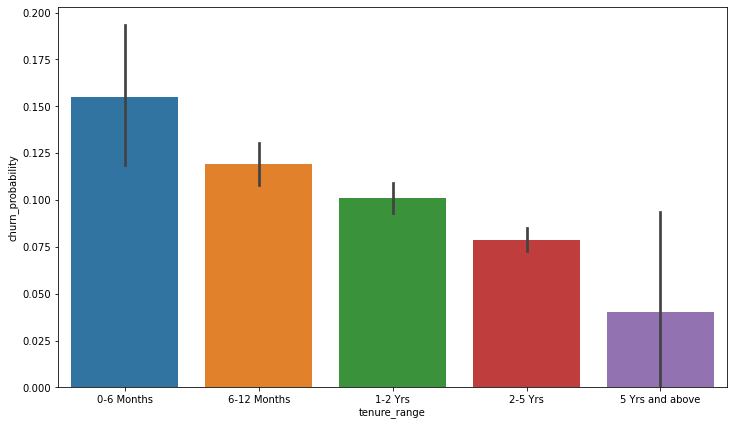

In [101]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=churn_filtered)
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network. The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two separate averages, lets take an average to these two and drop the other columns

In [102]:
colls = []
for col in churn_filtered.columns:
    if (churn_filtered[col].nunique() <20  and  churn_filtered[col].nunique() >1)  :
        colls+=[col]
        print('{} : {}'.format(col,churn_filtered[col].nunique()))

night_pck_user_6 : 3
night_pck_user_7 : 3
night_pck_user_8 : 3
monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_3g_6 : 10
monthly_3g_7 : 13
monthly_3g_8 : 12
fb_user_8 : 3
churn_probability : 2
tenure_range : 5


In [103]:
# Program to create bar chart
def category_counts(col):
    plt.figure(figsize=(8,6));
    sns.countplot(x=churn_filtered[col],palette='RdYlGn');
    plt.xlabel(col);
    plt.ylabel('Counts');
    plt.title(f"{col} Value Counts");
    plt.show()


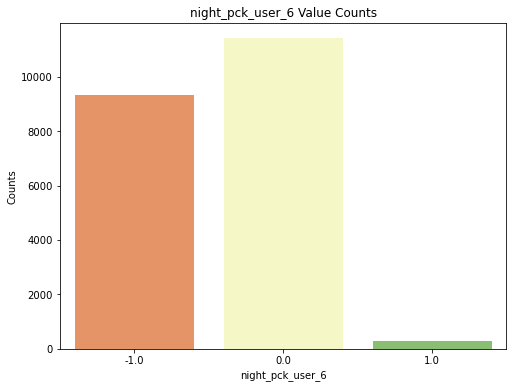

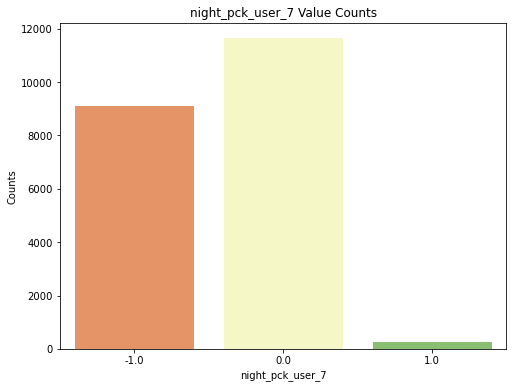

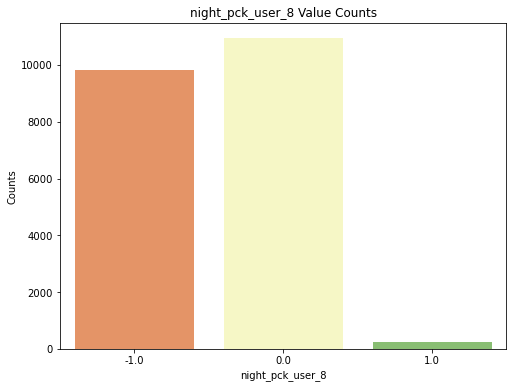

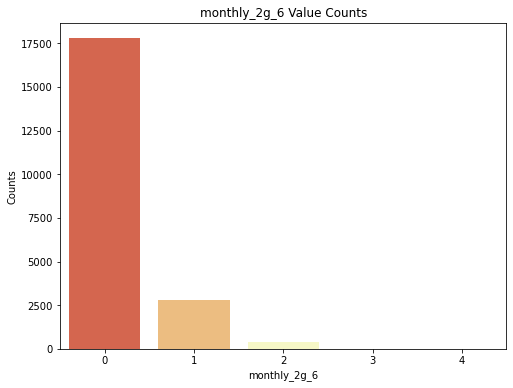

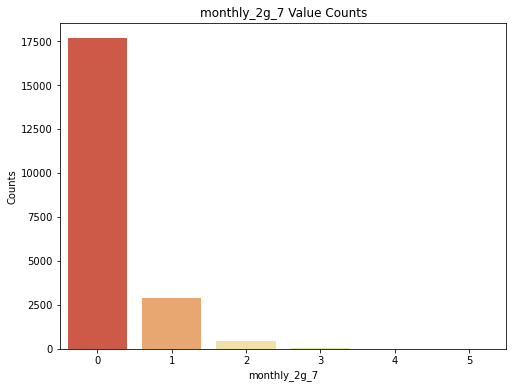

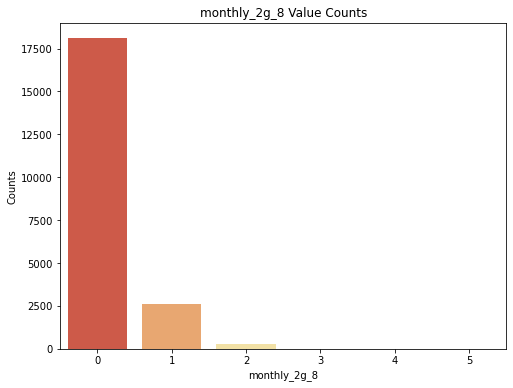

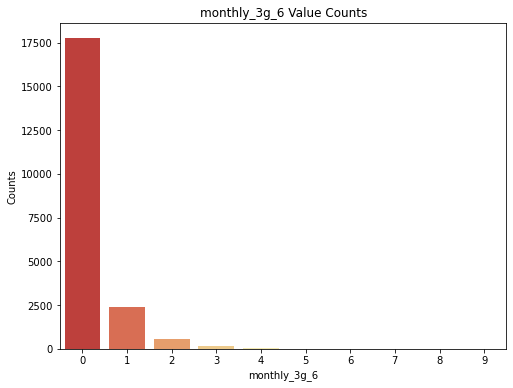

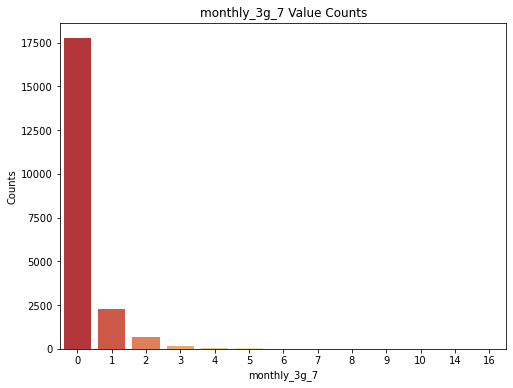

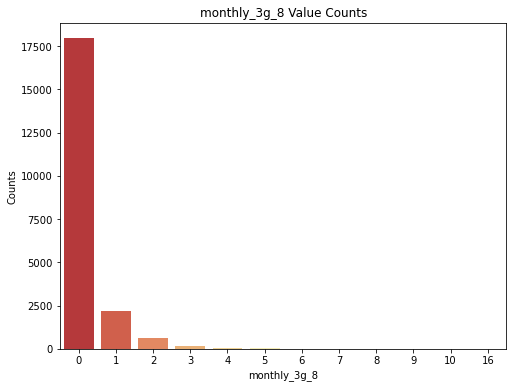

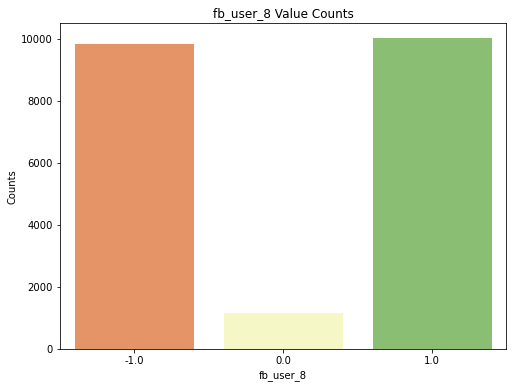

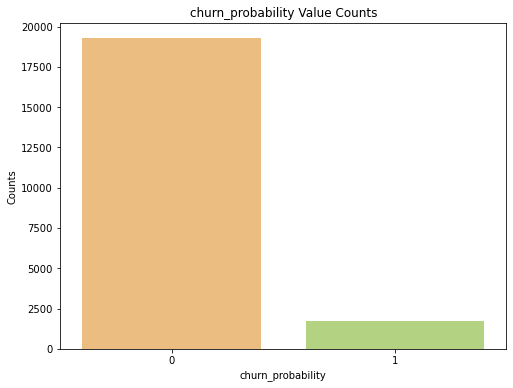

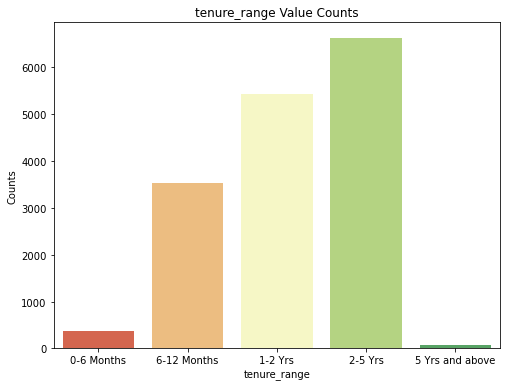

In [104]:
for col in colls:
    category_counts(col)

In [105]:
churn_filtered["avg_arpu_6_7"]= (churn_filtered['arpu_6']+churn_filtered['arpu_7'])/2
churn_filtered['avg_arpu_6_7'].head()

0     184.4495
1     478.9215
2    1018.2270
3     362.0215
4     370.7370
Name: avg_arpu_6_7, dtype: float64

In [106]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data
churn_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(21013, 135)

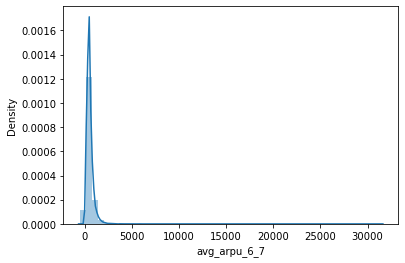

In [107]:
# Visualizing the column created
sns.distplot(churn_filtered['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

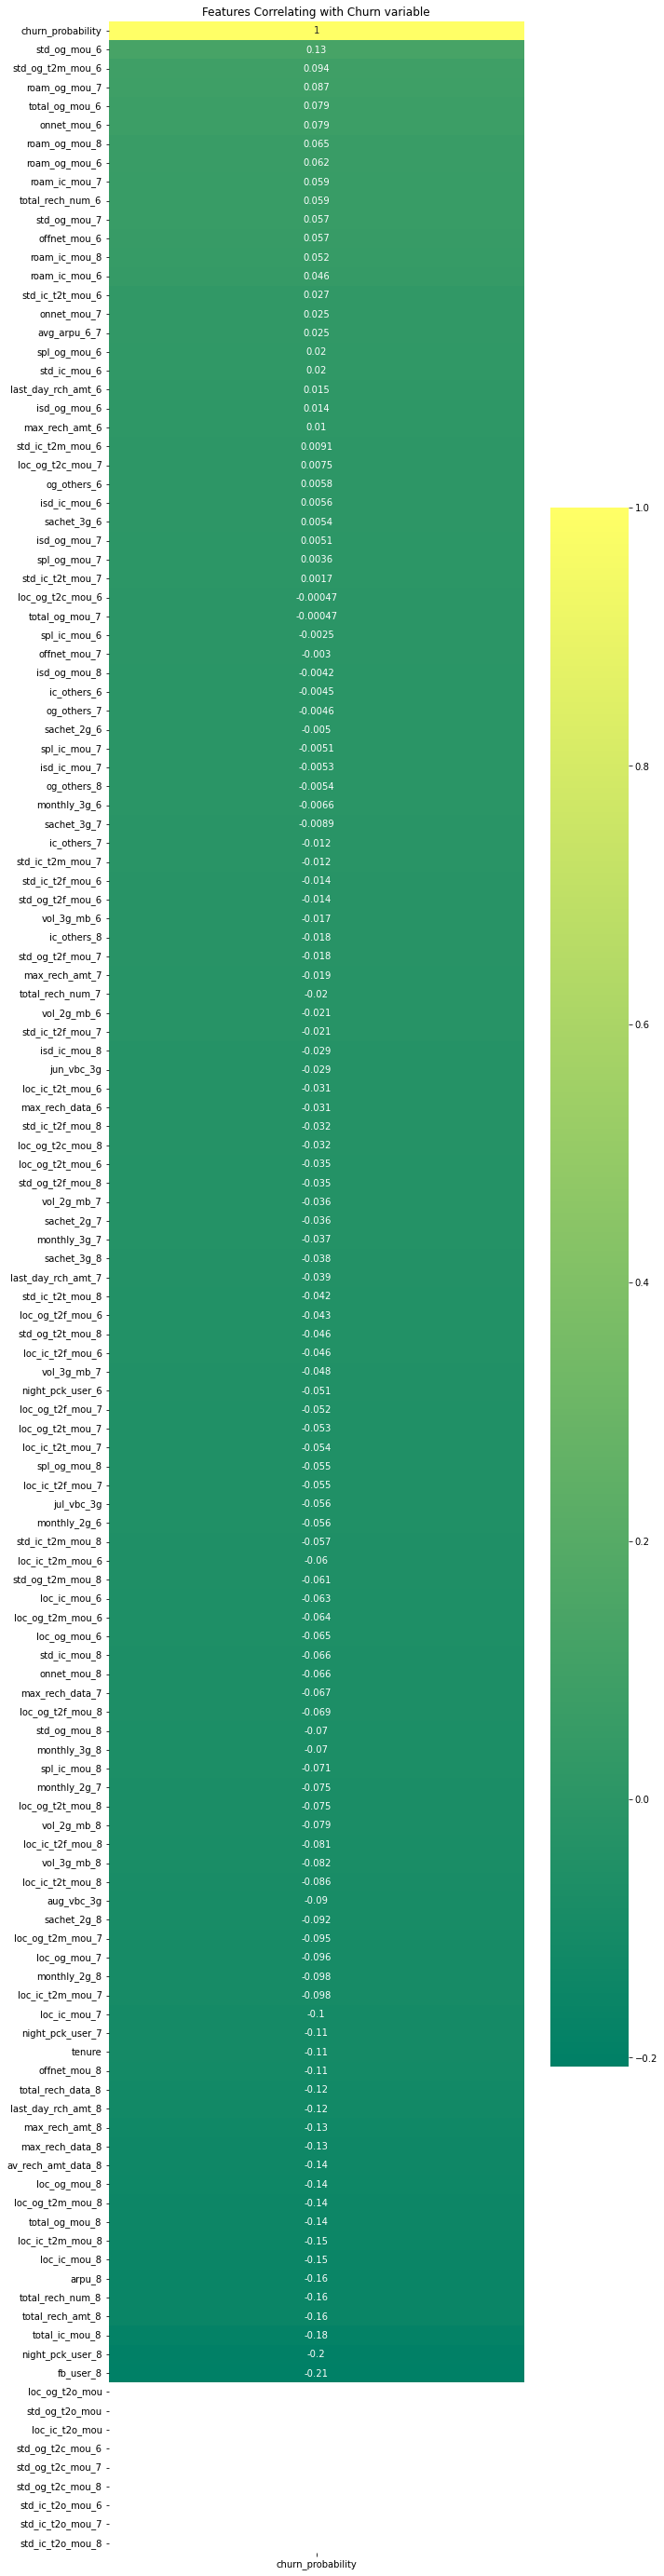

In [108]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap = sns.heatmap(churn_filtered.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap.set_title("Features Correlating with Churn variable")

In [109]:
churn_filtered.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'tenure', 'tenure_range',
       'avg_arpu_6_7'],
      dtype='object', length=135)

Avg Outgoing Calls & calls on roaming for 6th & 7th months are positively correlated with churn.
Avg Revenue, No. of Recharge for 8th month has negative correlation with churn.

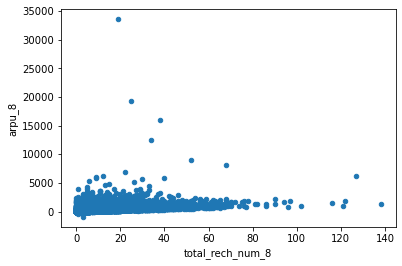

In [110]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

In [111]:
# Creating categories for month 8 column totalrecharge and their count
churn_filtered['total_rech_data_group_8']=pd.cut(churn_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_filtered['total_rech_num_group_8']=pd.cut(churn_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

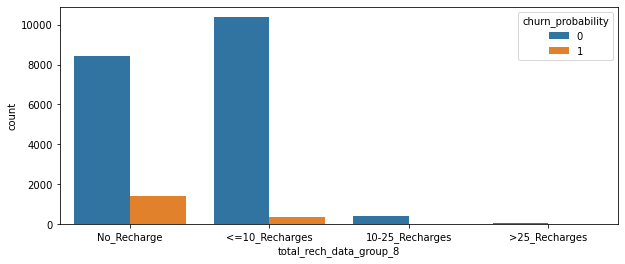

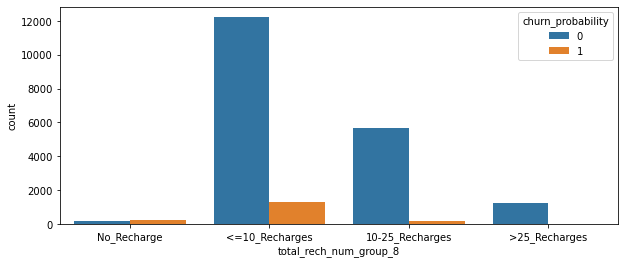

In [112]:
# Plotting the results

plt.figure(figsize=[10,4])
sns.countplot(data=churn_filtered,x="total_rech_data_group_8",hue="churn_probability")

plt.show()
plt.figure(figsize=[10,4])
sns.countplot(data=churn_filtered,x="total_rech_num_group_8",hue="churn_probability")

plt.show()

In [113]:
churn_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [114]:
churn_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [115]:
churn_filtered.shape

(21013, 56)

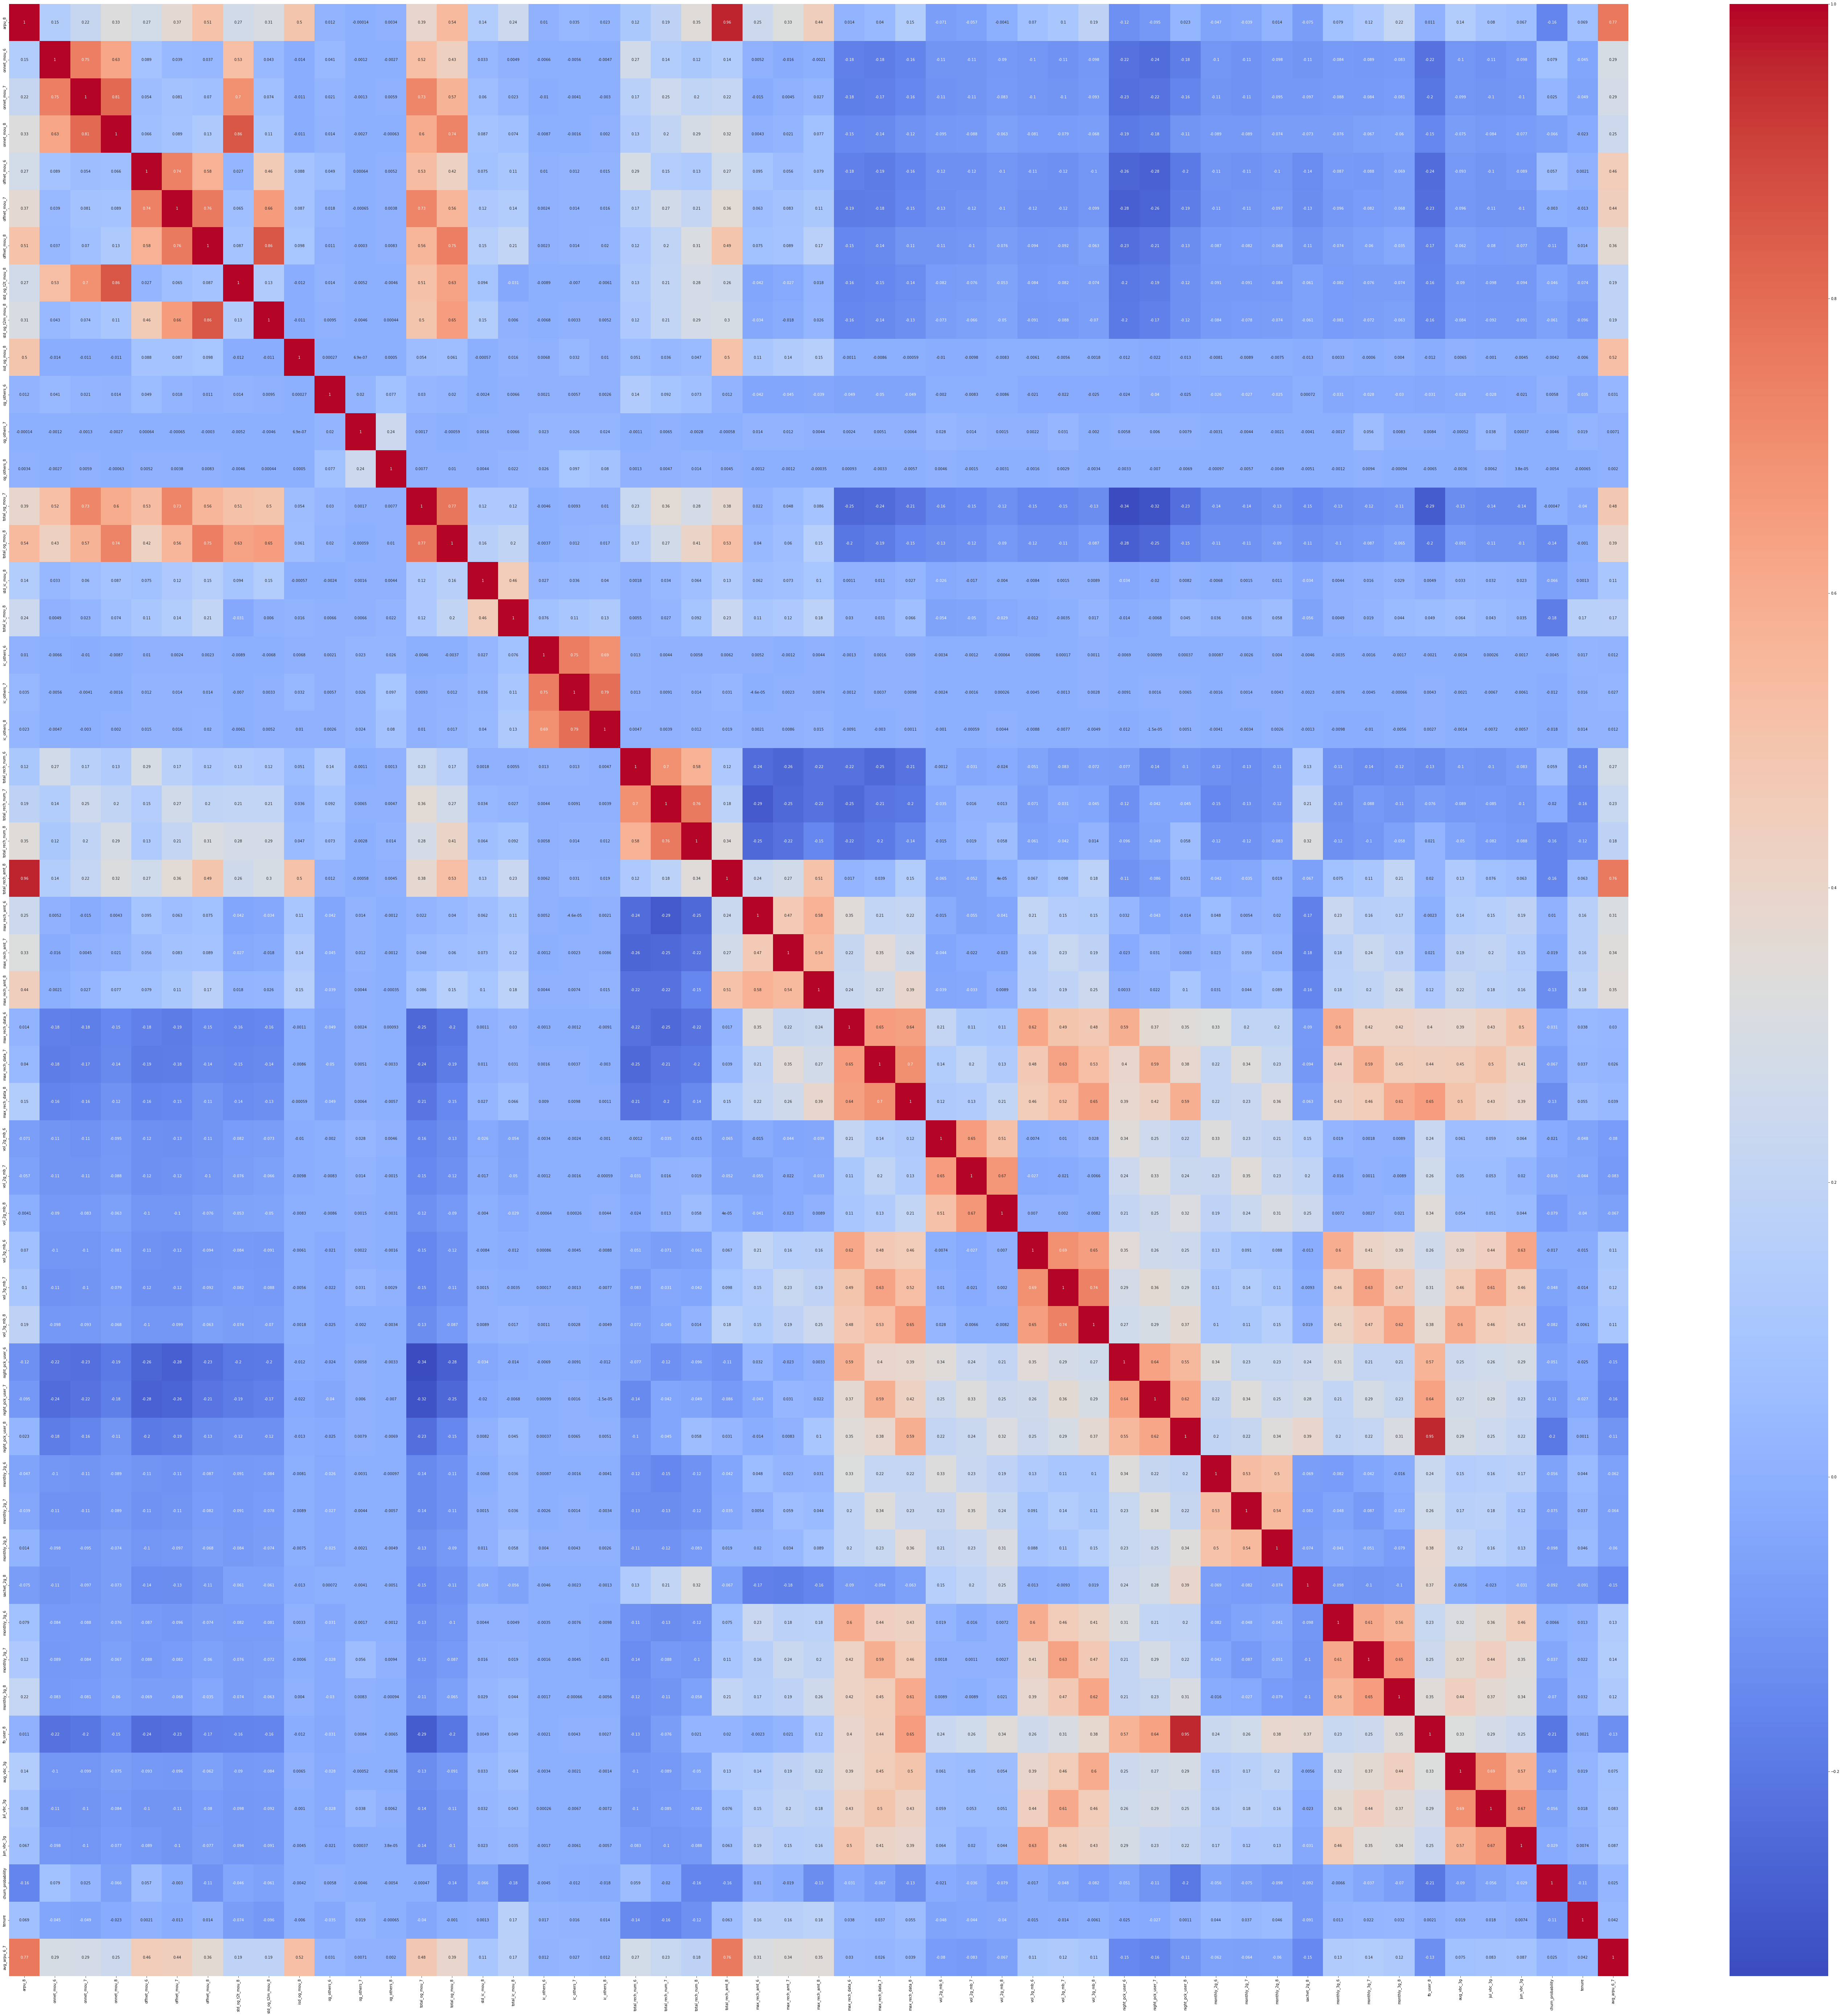

In [116]:
plt.figure(figsize = (100, 100))
sns.heatmap(churn_filtered.corr(),cmap="coolwarm",annot = True)
plt.show()

In [117]:
churn_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)

In [118]:
churn_filtered.shape

(21013, 54)

In [119]:
churn_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [120]:
churn_rate = (sum(churn_filtered["churn_probability"])/len(churn_filtered["churn_probability"].index))*100
churn_rate

8.275829248560415

# Feature Engineering and Variable Transformation
Data Modeling
Model Evaluation
Prepare Model for Predictor variables selection

Split Data Into Train and Test Data


In [121]:
churn_filtered.shape

(21013, 53)

In [122]:
# Divide data into train and test

X = churn_filtered.drop("churn_probability", axis = 1)
y = churn_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [123]:
# Print shapes of train and test sets
X_train.shape

(15759, 52)

In [124]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15759,)
(5254, 52)
(5254,)


Perform Scaling

In [125]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,553.107,597.83,448.53,594.29,149.26,175.73,299.99,569.78,194.28,0.00,2.31,0.0,0.0,567.31,811.06,20.54,74.66,0.00,0.00,0.00,10,10,9,677,128,110,150,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,99.0,533.9885
7183,199.111,364.79,617.33,51.71,124.69,258.86,40.08,0.00,0.00,0.00,0.00,0.0,0.0,843.16,0.00,0.00,0.00,0.00,0.00,0.00,19,27,5,180,36,50,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,37.0,520.9410
14666,267.706,84.68,117.61,87.43,552.86,510.43,383.46,3.40,30.44,1.55,0.00,0.0,0.0,628.04,470.89,77.16,679.71,3.83,5.28,13.16,2,6,2,200,150,215,200,152.0,152.0,152.0,17.59,25.76,42.74,495.46,397.32,289.58,0.0,0.0,0.0,0,0,0,1,0,0,0,1.0,197.37,288.6,185.75,93.0,397.1430
17922,409.262,636.51,728.43,700.23,177.04,137.53,162.48,694.38,135.54,0.00,0.00,0.0,0.0,865.96,862.88,18.84,25.21,0.00,0.00,0.00,11,10,11,596,110,110,130,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,12.0,444.9220
5165,293.627,739.41,185.51,66.08,481.24,673.68,534.98,53.94,488.14,0.00,0.00,0.0,0.0,861.13,547.49,10.98,24.11,0.00,0.00,0.00,12,13,6,360,110,110,130,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,32.0,470.9800


In [126]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [127]:
# Apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])


In [128]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,0.043460,0.081043,0.054982,0.059564,0.017849,0.029850,0.021417,0.071094,0.013927,0.000000,0.003788,0.0,0.0,0.068469,0.057755,0.005437,0.015553,0.000000,0.00000,0.000000,0.058824,0.072464,0.065217,0.014938,0.031920,0.033343,0.033715,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.673913,0.030909
7183,0.033196,0.049452,0.075674,0.005183,0.014911,0.043970,0.002861,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.101762,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.111765,0.195652,0.036232,0.003972,0.008978,0.015156,0.011238,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.224638,0.030500
14666,0.035185,0.011479,0.014417,0.008763,0.066113,0.086703,0.027376,0.000424,0.002182,0.000427,0.000000,0.0,0.0,0.075799,0.033532,0.020424,0.141594,0.002849,0.00353,0.010877,0.011765,0.043478,0.014493,0.004413,0.037406,0.065171,0.044954,0.097749,0.097749,0.097749,0.00171,0.003272,0.003844,0.010833,0.014117,0.009641,0.5,0.5,0.5,0.0,0.0,0.0,0.022727,0.0,0.0,0.0,1.0,0.015281,0.031487,0.016635,0.630435,0.026618
17922,0.039289,0.086286,0.089293,0.070182,0.021171,0.023361,0.011600,0.086641,0.009716,0.000000,0.000000,0.0,0.0,0.104513,0.061445,0.004987,0.005252,0.000000,0.00000,0.000000,0.064706,0.072464,0.079710,0.013151,0.027431,0.033343,0.029220,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.043478,0.028116
5165,0.035937,0.100236,0.022740,0.006623,0.057548,0.114432,0.038193,0.006730,0.034992,0.000000,0.000000,0.0,0.0,0.103930,0.038987,0.002906,0.005022,0.000000,0.00000,0.000000,0.070588,0.094203,0.043478,0.007944,0.027431,0.033343,0.029220,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.188406,0.028933


Too many variables, we will start the process of dropping variables after doing the RFE

# Using SMOTE method, We can balance the data w.r.t. churn variable and proceed further

In [129]:
! pip install imblearn
from imblearn.over_sampling import SMOTE

In [130]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [131]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (28910, 52)
Dimension of y_train_sm Shape: (28910,)


Logistic Regression

In [132]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                28910
Model:                            GLM   Df Residuals:                    28857
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 17 Jan 2023   Deviance:                       22394.
Time:                        21:17:05   Pearson chi2:                 1.80e+07
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2170      0.197      1.104      0.270      -0.168       0.602
arpu_8              -5.5828      6.773     -0.824      0.410     -18.858       7.692
onnet_mou_6         -0.7263      0.484     -1.500      0.134      -1.675       0.223
onnet_mou_7         -7.1595      2.151     -3.328      0.001     -11.375      -2.944
onnet_mou_8         75.8806      3.628     20.917      0.000      68.770      82.991
offnet_mou_6        -0.3989      0.567     -0.703      0.482      -1.511       0.713
offnet_mou_7        -5.2920      1.536     -3.445      0.001      -8.303      -2.281
offnet_mou_8        96.9212      4.667     20.769      0.000      87.775     106.068
std_og_t2t_mou_8     7.7649      1.622      4.788      0.000       4.586      10.944
std_og_t2m_mou_8    19.7109      2.965      6.648      0.000      13.900      25.522
isd_og_mou_8        36.3631      4.428      8.212      0.000      27.684      45.042
og_others_6        -14.6087      6.447     -2.266      0.023     -27.244      -1.973
og_others_7         -3.5242      9.742     -0.362      0.718     -22.619      15.570
og_others_8      -5.252e+05   5.83e+07     -0.009      0.993   -1.15e+08    1.14e+08
total_og_mou_7       8.6655      2.010      4.310      0.000       4.725      12.606
total_og_mou_8    -120.3230      4.488    -26.812      0.000    -129.119    -111.527
std_ic_mou_8         9.4941      1.393      6.816      0.000       6.764      12.224
total_ic_mou_8     -21.3638      0.977    -21.869      0.000     -23.278     -19.449
ic_others_6        -11.8896      5.113     -2.325      0.020     -21.911      -1.868
ic_others_7          8.8567      4.551      1.946      0.052      -0.064      17.777
ic_others_8         -1.1223      5.517     -0.203      0.839     -11.935       9.690
total_rech_num_6     1.4315      0.574      2.496      0.013       0.307       2.556
total_rech_num_7     4.6727      0.579      8.068      0.000       3.538       5.808
total_rech_num_8   -10.9223      0.756    -14.452      0.000     -12.404      -9.441
total_rech_amt_8   -87.6504      8.950     -9.793      0.000    -105.193     -70.108
max_rech_amt_6      -1.3481      0.595     -2.267      0.023      -2.514      -0.183
max_rech_amt_7      -0.4347      0.495     -0.878      0.380      -1.404       0.535
max_rech_amt_8       2.8383      1.059      2.681      0.007       0.764       4.913
max_rech_data_6      0.2782      0.543      0.512      0.609      -0.787       1.343
max_rech_data_7      2.7959      0.584      4.786      0.000       1.651       3.941
max_rech_data_8     -1.0049      0.718     -1.400      0.162      -2.412       0.402
vol_2g_mb_6         -0.6271      0.855     -0.734      0.463      -2.303       1.048
vol_2g_mb_7          3.3258      0.734      4.529      0.000       1.886       4.765
vol_2g_mb_8         -4.

Logistic Regression using Feature Selection (RFE method)

In [133]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [134]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False,  True, False, False, False,  True])

In [135]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'total_og_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')


In [136]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 3),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 27),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 7),
 ('std_og_t2t_mou_8', False, 14),
 ('std_og_t2m_mou_8', False, 26),
 ('isd_og_mou_8', False, 8),
 ('og_others_6', False, 15),
 ('og_others_7', False, 21),
 ('og_others_8', False, 29),
 ('total_og_mou_7', False, 4),
 ('total_og_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('ic_others_6', False, 31),
 ('ic_others_7', False, 28),
 ('ic_others_8', False, 20),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_6', True, 1),
 ('max_rech_amt_7', False, 12),
 ('max_rech_amt_8', True, 1),
 ('max_rech_data_6', False, 30),
 ('max_rech_data_7', False, 9),
 ('max_rech_data_8', False, 23),
 ('vol_2g_mb_6', False, 33),
 ('vol_2g_mb_7', False, 5),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', 

Assessing the model with StatsModels

In [137]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                28910
Model:                            GLM   Df Residuals:                    28889
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11906.
Date:                Tue, 17 Jan 2023   Deviance:                       23811.
Time:                        21:17:20   Pearson chi2:                 2.07e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4303
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1961      0.165      1.186      0.236      -0.128       0.520
arpu_8               7.2868      5.629      1.295      0.195      -3.746      18.319
onnet_mou_7          5.4064      0.491     11.007      0.000       4.444       6.369
offnet_mou_6         0.5460      0.535      1.020      0.308      -0.503       1.595
offnet_mou_7         2.6138      0.427      6.118      0.000       1.776       3.451
total_og_mou_8     -15.6507      0.975    -16.045      0.000     -17.563     -13.739
std_ic_mou_8        21.0384      1.257     16.735      0.000      18.574      23.502
total_ic_mou_8     -34.9448      0.843    -41.434      0.000     -36.598     -33.292
total_rech_num_6     2.6801      0.491      5.458      0.000       1.718       3.643
total_rech_num_7     3.3810      0.519      6.508      0.000       2.363       4.399
total_rech_num_8   -11.7347      0.683    -17.179      0.000     -13.073     -10.396
total_rech_amt_8   -38.0185      6.570     -5.787      0.000     -50.895     -25.142
max_rech_amt_6       0.4507      0.529      0.852      0.394      -0.586       1.487
max_rech_amt_8      -1.7750      0.754     -2.355      0.019      -3.252      -0.298
vol_2g_mb_8         -5.1617      1.106     -4.665      0.000      -7.330      -2.993
vol_3g_mb_8         -5.0002      1.297     -3.854      0.000      -7.543      -2.458
monthly_2g_8        -7.4544      0.438    -17.035      0.000      -8.312      -6.597
sachet_2g_8         -5.8319      0.511    -11.416      0.000      -6.833      -4.831
monthly_3g_8        -5.5034      0.894     -6.157      0.000      -7.255      -3.752
aug_vbc_3g          -9.6254      1.116     -8.626      0.000     -11.812      -7.438
avg_arpu_6_7        40.7496      3.383     12.045      0.000      34.119      47.381
====================================================================================
"""

In [138]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]


array([0.46213275, 0.92969285, 0.02331119, 0.52167338, 0.73533445,
       0.64270193, 0.13105183, 0.08483161, 0.1320682 , 0.9422494 ])

In [139]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.462133
1,1,0.929693
2,0,0.023311
3,0,0.521673
4,0,0.735334


Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [140]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.462133,0
1,1,0.929693,1
2,0,0.023311,0
3,0,0.521673,1
4,0,0.735334,1


In [141]:
## Passing and Printing confusion martix Value 
def confusion_matrix_plot (confusion) :
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    confusion.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         confusion.flatten()/np.sum(confusion)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    #specify size of heatmap
    fig, ax = plt.subplots(figsize=(15, 8))
    
    annot_kws={'fontsize':20}
    
    ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues',annot_kws= annot_kws)

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    #Priting confusion matrix value 
    print("Confusion matrix actual value")
    print(confusion)
    print("")
    print("")
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    # Let's see the sensitivity of our logistic regression model
    print("Sensitivity = ",TP / float(TP+FN))

    # Let us calculate specificity
    print("Specificity = ",TN / float(TN+FP))

    # Calculate false postive rate - predicting churn when customer does not have churned
    print("False Positive Rate = ",FP/ float(TN+FP))

    # positive predictive value 
    print ("Precision = ",TP / float(TP+FP))

    # Negative predictive value
    print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

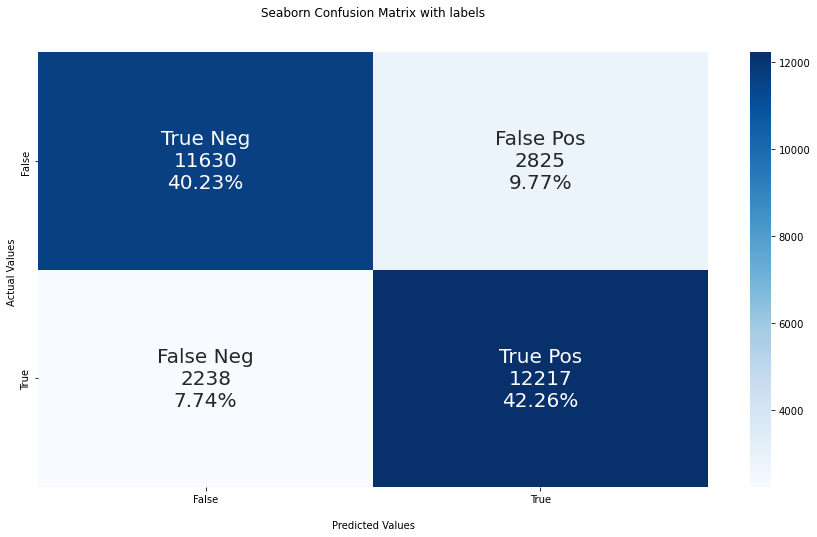

Confusion matrix actual value
[[11630  2825]
 [ 2238 12217]]


Sensitivity =  0.8451746800415081
Specificity =  0.8045658941542719
False Positive Rate =  0.19543410584572812
Precision =  0.8121925275894163
True Negative Prediction Rate =  0.8386212864147679


In [142]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
confusion_matrix_plot(confusion)

In [143]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.82487028709789


Check for the VIF values of the feature variables

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,avg_arpu_6_7,26.75
0,arpu_8,24.73
8,total_rech_num_7,8.53
9,total_rech_num_8,6.71
7,total_rech_num_6,5.97
10,total_rech_amt_8,5.66
3,offnet_mou_7,5.29
4,total_og_mou_8,5.10
2,offnet_mou_6,4.70
12,max_rech_amt_8,3.46


Plotting the ROC Curve

In [145]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [146]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

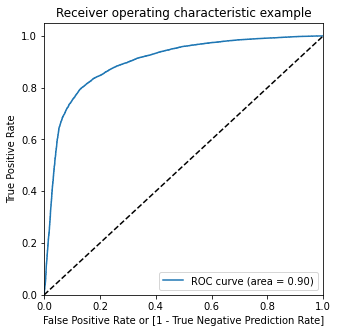

In [147]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

Finding Optimal Cutoff Point

In [148]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0


In [149]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.683293     0.974957     0.391629
0.2          0.2  0.743065     0.951228     0.534901
0.3          0.3  0.782255     0.919958     0.644552
0.4          0.4  0.810377     0.885368     0.735386
0.5          0.5  0.824870     0.845175     0.804566
0.6          0.6  0.832722     0.796749     0.868696
0.7          0.7  0.819613     0.722103     0.917122
0.8          0.8  0.766482     0.577793     0.955171
0.9          0.9  0.608717     0.234521     0.982912


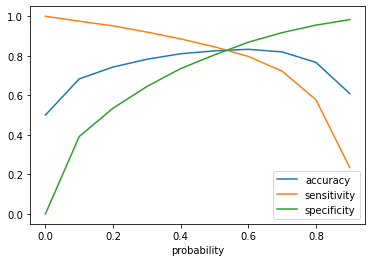

In [150]:
# Plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Initially we selected the optimum point of classification as 0.5.

From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [151]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.824870     0.845175     0.804566
0.51         0.51  0.826773     0.842062     0.811484
0.52         0.52  0.828571     0.838395     0.818748
0.53         0.53  0.829298     0.833068     0.825527
0.54         0.54  0.829505     0.827534     0.831477
0.55         0.55  0.830439     0.822899     0.837980
0.56         0.56  0.831235     0.818402     0.844068
0.57         0.57  0.831581     0.813767     0.849395
0.58         0.58  0.831615     0.807887     0.855344
0.59         0.59  0.832065     0.802629     0.861501


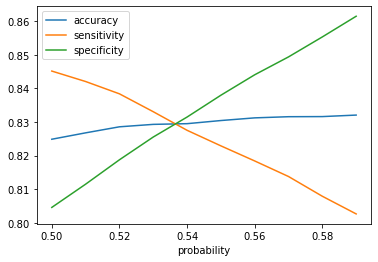

In [153]:
# Plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [154]:
# From the curve above,we can take 0.54 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1


In [155]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8292978208232445


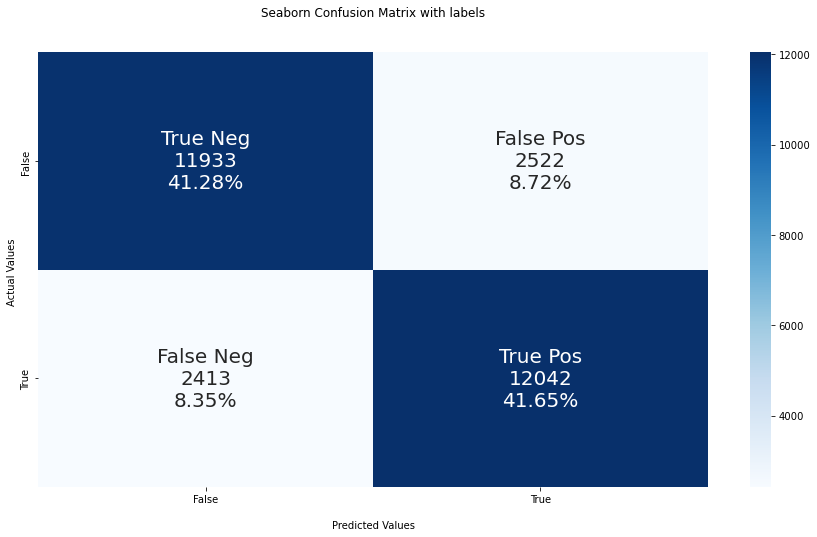

Confusion matrix actual value
[[11933  2522]
 [ 2413 12042]]


Sensitivity =  0.8330681425112418
Specificity =  0.8255274991352474
False Positive Rate =  0.1744725008647527
Precision =  0.826833287558363
True Negative Prediction Rate =  0.8317998048236442


In [156]:
confusion2 = confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
confusion_matrix_plot(confusion2)

Precision and recall tradeoff

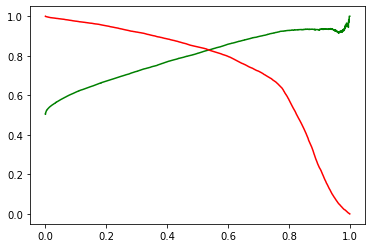

In [157]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the test set Transforming and feature selection for test data

In [158]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
15213,0.027423,0.010572,0.001738,0.000000,0.230827,0.038560,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.026877,0.00000,0.000000,0.000000,0.000357,0.000000,0.000000,0.141176,0.036232,0.021739,0.000000,0.027431,0.033343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072464,0.031985
4229,0.034596,0.044357,0.003550,0.005270,0.013873,0.019583,0.004036,0.000000,0.000002,0.0,0.000000,0.0,0.0,0.017722,0.00661,0.000731,0.023340,0.000342,0.000455,0.001372,0.052941,0.043478,0.021739,0.004303,0.029925,0.046681,0.039335,0.099035,0.099035,0.112540,0.000261,0.000070,0.002909,0.021951,0.027973,0.016452,0.5,0.5,0.5,0.25,0.2,0.4,0.000000,0.0,0.0,0.0,1.0,0.007328,0.020946,0.016365,0.014493,0.025160
12573,0.029726,0.029326,0.009352,0.000068,0.136577,0.213513,0.009037,0.000085,0.009004,0.0,0.005707,0.0,0.0,0.161518,0.00920,0.000365,0.000585,0.000000,0.000000,0.000000,0.052941,0.079710,0.021739,0.000662,0.027431,0.033343,0.006743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.033341
19178,0.052097,0.078142,0.049328,0.041272,0.059096,0.048713,0.061279,0.049712,0.040981,0.0,0.000000,0.0,0.0,0.083179,0.09174,0.000524,0.036805,0.000342,0.000000,0.000000,0.182353,0.289855,0.239130,0.021536,0.022444,0.009094,0.022477,0.000000,0.016077,0.010932,0.000000,0.051287,0.008589,0.000000,0.000000,0.000000,0.0,0.5,0.5,0.00,0.0,0.0,0.045455,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.007246,0.036936
15524,0.027423,0.107705,0.037836,0.000000,0.098439,0.067828,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.080973,0.00000,0.000000,0.000000,0.005476,0.000000,0.000000,0.111765,0.079710,0.043478,0.000000,0.027431,0.033343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072464,0.032732


In [159]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_8,onnet_mou_7,offnet_mou_6,offnet_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,avg_arpu_6_7
15213,0.027423,0.001738,0.230827,0.038560,0.00000,0.000000,0.000000,0.141176,0.036232,0.021739,0.000000,0.027431,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.031985
4229,0.034596,0.003550,0.013873,0.019583,0.00661,0.000731,0.023340,0.052941,0.043478,0.021739,0.004303,0.029925,0.039335,0.002909,0.016452,0.4,0.000000,0.0,0.007328,0.025160
12573,0.029726,0.009352,0.136577,0.213513,0.00920,0.000365,0.000585,0.052941,0.079710,0.021739,0.000662,0.027431,0.006743,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.033341
19178,0.052097,0.049328,0.059096,0.048713,0.09174,0.000524,0.036805,0.182353,0.289855,0.239130,0.021536,0.022444,0.022477,0.008589,0.000000,0.0,0.045455,0.0,0.000000,0.036936
15524,0.027423,0.037836,0.098439,0.067828,0.00000,0.000000,0.000000,0.111765,0.079710,0.043478,0.000000,0.027431,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.032732


In [160]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

Predicting the target variable

In [161]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:20])


 The first ten probability value of the prediction are:
 15213    0.899673
4229     0.063684
12573    0.919032
19178    0.063022
15524    0.903480
17429    0.820392
9740     0.276279
12546    0.002772
20591    0.178271
13319    0.181919
64       0.377115
19717    0.643380
2680     0.011282
6306     0.148048
18109    0.084793
16553    0.021312
1433     0.070790
9081     0.700528
17899    0.009382
4034     0.196300
dtype: float64


In [162]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head(10)

,0
15213,0.899673
4229,0.063684
12573,0.919032
19178,0.063022
15524,0.903480
17429,0.820392
9740,0.276279
12546,0.002772
20591,0.178271
13319,0.181919


In [163]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [164]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
15213,1
4229,0
12573,0
19178,0
15524,1


In [165]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn_probability,Conv_prob
15213,1,0.899673
4229,0,0.063684
12573,0,0.919032
19178,0,0.063022
15524,1,0.903480


In [166]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.50 else 0)
y_pred_final.head()

,churn_probability,Conv_prob,test_churn_pred
15213,1,0.899673,1
4229,0,0.063684,0
12573,0,0.919032,1
19178,0,0.063022,0
15524,1,0.903480,1


In [167]:
# Checking the overall accuracy of the predicted set.
accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.8075751808146174

Metrics Evaluation

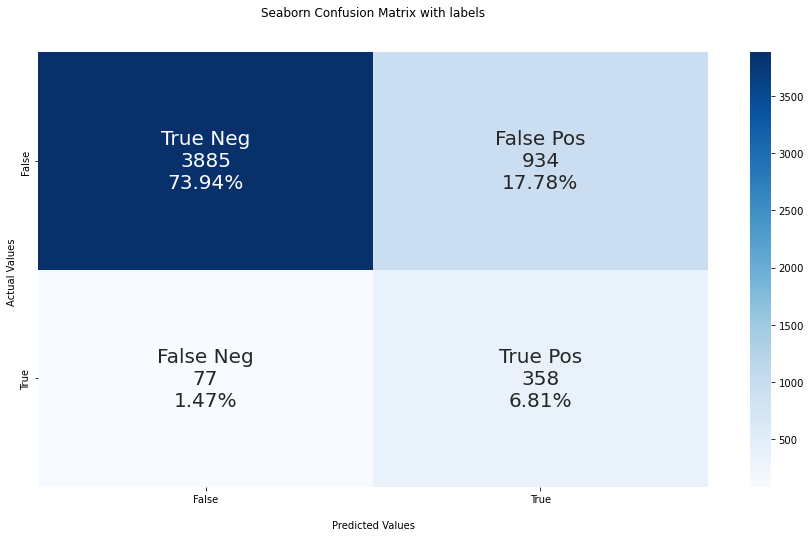

Confusion matrix actual value
[[3885  934]
 [  77  358]]


Sensitivity =  0.8229885057471265
Specificity =  0.8061838555716954
False Positive Rate =  0.19381614442830464
Precision =  0.2770897832817337
True Negative Prediction Rate =  0.980565371024735


In [168]:
# Confusion Matrix
confusion2_test = confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
confusion_matrix_plot(confusion2_test)

In [169]:
# ROC curve for the test dataset
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

print("The accuracy of the predicted model is: ",round(accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  81.0 %
The sensitivity of the predicted model is:  82.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



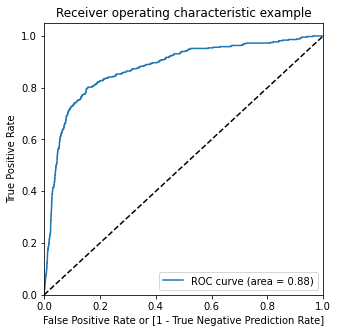

In [170]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

The AUC score for train dataset is 0.90 and the test dataset is 0.88. This model can be considered as a good model.

PCA

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [172]:
X_train.shape

(16810, 52)

In [173]:
pca = PCA(random_state=42)

In [174]:
pca.fit(X_train)

PCA(random_state=42)

In [175]:
pca.components_

array([[-9.90426696e-03, -7.99182337e-02, -9.74727314e-02, ...,
         1.69848926e-01,  4.35447656e-05, -8.48816798e-03],
       [ 2.89311095e-01,  1.37346355e-01,  1.94653867e-01, ...,
         4.85641414e-02,  1.14273988e-05,  2.28091894e-01],
       [ 2.09177223e-01, -3.55776054e-01, -4.36148266e-01, ...,
        -8.86666119e-03,  2.99066021e-03,  1.33293061e-01],
       ...,
       [-1.38028760e-05, -2.34674783e-05,  4.40883678e-05, ...,
        -4.15145876e-05, -5.35559625e-05,  2.20451579e-05],
       [ 1.51530538e-05,  1.58107116e-05,  8.66603192e-05, ...,
        -1.68771451e-05, -6.33433153e-05, -1.55387058e-04],
       [ 3.29090533e-06, -1.00170417e-05, -3.46873775e-05, ...,
         4.05847431e-06, -1.46183671e-04, -7.30428886e-06]])

Analysing the explained variance ratio

In [176]:
pca.explained_variance_ratio_

array([3.30757137e-01, 2.49757152e-01, 8.57094342e-02, 6.38745202e-02,
       4.43347508e-02, 3.43096102e-02, 3.36099665e-02, 3.05610553e-02,
       2.77727739e-02, 1.67762370e-02, 1.36537701e-02, 1.30483677e-02,
       7.50058659e-03, 6.74043417e-03, 6.28704581e-03, 5.68578769e-03,
       4.89873530e-03, 4.80169987e-03, 4.13830502e-03, 3.68999461e-03,
       2.31278963e-03, 2.23161812e-03, 1.89021336e-03, 1.48362031e-03,
       1.39183073e-03, 7.91994641e-04, 7.36442586e-04, 4.13517861e-04,
       3.46617688e-04, 1.68197691e-04, 1.23655371e-04, 8.38021042e-05,
       7.59094956e-05, 1.70732341e-05, 7.58275541e-06, 6.42388188e-06,
       3.60772927e-06, 3.11660159e-06, 1.79652537e-06, 1.54214163e-06,
       6.49773995e-07, 3.99551309e-07, 7.44145110e-08, 6.30229861e-08,
       2.30964343e-08, 1.78796157e-08, 1.60708675e-08, 1.42497337e-08,
       8.65279282e-09, 7.59070205e-09, 6.80550174e-09, 2.22153607e-09])

In [177]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

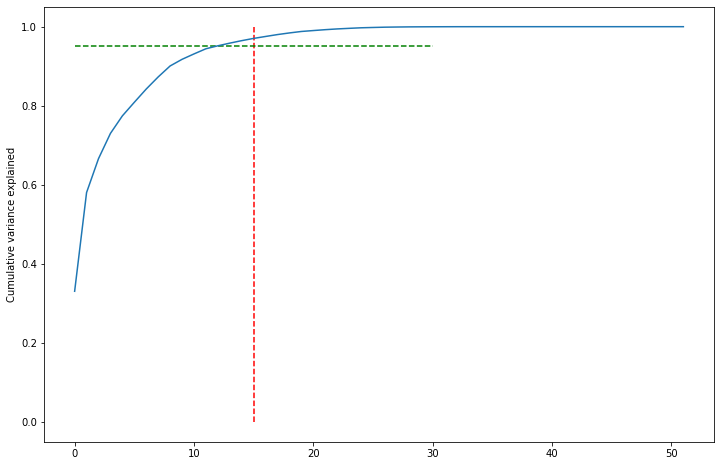

In [178]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [179]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)

In [180]:
df_train_pca = pca_final.fit_transform(X_train)

In [181]:
df_train_pca.shape

(16810, 16)

In [182]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [183]:
corrmat.shape

(16, 16)

In [184]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4203, 16)

Applying logistic regression on the Principal components

In [185]:
learner_pca = LogisticRegression()

In [186]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [187]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [188]:
"{:2.2}".format(roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

Confusion matrix, Sensitivity and Specificity

In [189]:
pred_probs_test1 = model_pca.predict(df_test_pca)

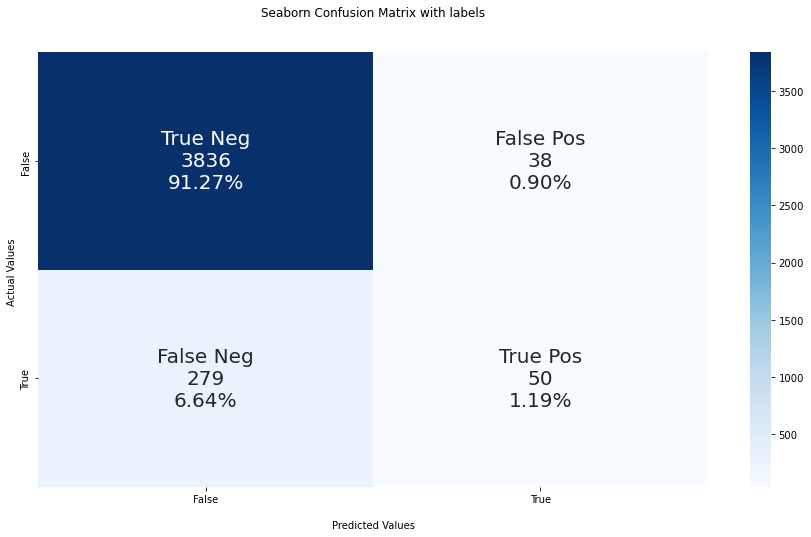

Confusion matrix actual value
[[3836   38]
 [ 279   50]]


Sensitivity =  0.1519756838905775
Specificity =  0.9901910170366546
False Positive Rate =  0.00980898296334538
Precision =  0.5681818181818182
True Negative Prediction Rate =  0.9321992709599028


In [190]:
# Confusion matrix
confusion = confusion_matrix(y_test, pred_probs_test1)
confusion_matrix_plot(confusion)

In [191]:
# Accuracy
print("Accuracy:-",accuracy_score(y_test, pred_probs_test1))

Accuracy:- 0.9245776826076612


Making predictions on the train set

In [192]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [193]:
"{:2.2}".format(roc_auc_score(y_train, pred_probs_train[:,1]))

'0.87'

In [194]:
pred_probs_train1 = model_pca.predict(df_train_pca)


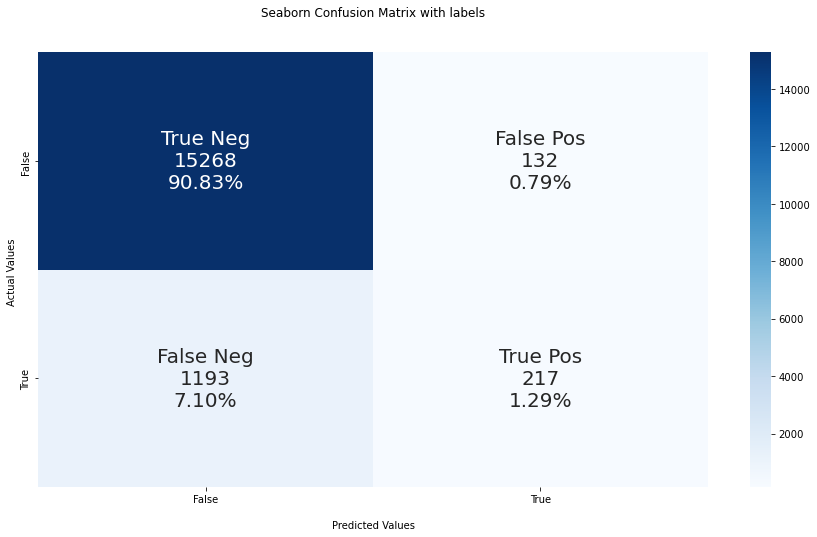

Confusion matrix actual value
[[15268   132]
 [ 1193   217]]


Sensitivity =  0.15390070921985816
Specificity =  0.9914285714285714
False Positive Rate =  0.008571428571428572
Precision =  0.6217765042979942
True Negative Prediction Rate =  0.9275256667274163


In [195]:
# Confusion matrix
confusion = confusion_matrix(y_train, pred_probs_train1)
confusion_matrix_plot(confusion)

In [196]:
# Accuracy
print("Accuracy:-",accuracy_score(y_train, pred_probs_train1))

Accuracy:- 0.9211778703152885


Decision Tree with PCA

In [197]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
dt = DecisionTreeClassifier(random_state=42)

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
params = { 'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50] }


In [201]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [202]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [203]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.202675,0.013904,0.002992,7.046956e-04,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
1,0.192552,0.012152,0.003122,5.369733e-04,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
2,0.185753,0.006478,0.002992,8.344650e-07,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
3,0.189178,0.004043,0.002992,4.578320e-07,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
4,0.188238,0.006981,0.002993,4.129531e-07,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61


In [204]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
54,0.374000,0.019093,0.001746,4.319148e-04,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
56,0.342426,0.010195,0.001995,1.976862e-07,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
69,0.722817,0.073717,0.003739,4.318802e-04,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min...",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
71,0.754483,0.059047,0.003491,4.987719e-04,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min...",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
55,0.329126,0.007330,0.001995,3.526258e-07,10,50,150,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.925291,0.923864,0.920990,0.922418,0.923141,0.001604,5


In [205]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [206]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [207]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [208]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [209]:
evaluate_model(dt_best)

Train Accuracy : 0.9365258774538965
Train Confusion Matrix:
[[15163   237]
 [  830   580]]
--------------------------------------------------
Test Accuracy : 0.926481084939329
Test Confusion Matrix:
[[3791   83]
 [ 226  103]]


Random Forest with PCA

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

7


In [212]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

In [213]:
rf.fit(df_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.7s finished


RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [214]:
rf.oob_score_

0.9190362879238548

In [215]:
from sklearn.metrics import plot_roc_curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


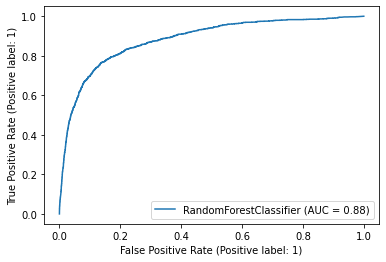

In [216]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

Hyper-parameter tuning for the Random Forest

In [217]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [218]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [219]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [220]:
grid_search.fit( df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [221]:
grid_search.best_score_

0.9187983544085767

In [222]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [223]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [224]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [225]:
evaluate_model(rfc_model)

Train Accuracy : 0.9202855443188578
Train Confusion Matrix:
[[15353    47]
 [ 1293   117]]
--------------------------------------------------
Test Accuracy : 0.9236259814418273
Test Confusion Matrix:
[[3860   14]
 [ 307   22]]


In [226]:
rfc_model.feature_importances_

array([0.06308563, 0.15247523, 0.02000646, 0.08835245, 0.02539142,
       0.18925586, 0.06330715, 0.03160748, 0.04983117, 0.2422836 ,
       0.010111  , 0.02472693, 0.0254727 , 0.00574444, 0.00407983,
       0.00426865])

Conclusion :
The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.

The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

Details:

After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

Logistic Regression :

Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

Logistic Regression

Train Accuracy : ~82% . Test Accuracy : ~82%*

Logistic regression with PCA

Train Accuracy : ~92% . Test Accuracy : ~92%*

Decision Tree with PCA:

Train Accuracy : ~94% . Test Accuracy : ~93%*

Random Forest with PCA:

Train Accuracy :~ 92% . Test Accuracy :~ 92%*


In [227]:
telecom_churn_test = pd.read_csv("C:\\Users\\Akansh\\Downloads\\telecom-churn-case-study-hackathon-c43 (1)\\test.csv")

In [228]:
telecom_churn_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [229]:
telecom_churn_test.shape


(30000, 171)

In [230]:
telecom_churn_test.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                316
std_og_t2o_mou                316
loc_ic_t2o_mou                316
last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  1169
onnet_mou_7                  1172
onnet_mou_8                  1675
offnet_mou_6                 1169
offnet_mou_7                 1172
offnet_mou_8                 1675
roam_ic_mou_6                1169
roam_ic_mou_7                1172
roam_ic_mou_8                1675
roam_og_mou_6                1169
roam_og_mou_7                1172
roam_og_mou_8                1675
loc_og_t2t_mou_6             1169
loc_og_t2t_mou_7             1172
loc_og_t2t_mou_8             1675
loc_og_t2m_mou_6             1169
loc_og_t2m_mou_7             1172
loc_og_t2m_mou_8             1675
loc_og_t2f_mou

In [231]:
telecom_churn_test['id']

0        69999
1        70000
2        70001
3        70002
4        70003
5        70004
6        70005
7        70006
8        70007
9        70008
10       70009
11       70010
12       70011
13       70012
14       70013
15       70014
16       70015
17       70016
18       70017
19       70018
20       70019
21       70020
22       70021
23       70022
24       70023
25       70024
26       70025
27       70026
28       70027
29       70028
30       70029
31       70030
32       70031
33       70032
34       70033
35       70034
36       70035
37       70036
38       70037
39       70038
40       70039
41       70040
42       70041
43       70042
44       70043
45       70044
46       70045
47       70046
48       70047
49       70048
50       70049
51       70050
52       70051
53       70052
54       70053
55       70054
56       70055
57       70056
58       70057
59       70058
60       70059
61       70060
62       70061
63       70062
64       70063
65       70064
66       7

In [232]:
churn_id = telecom_churn_test['id']

In [233]:
telecom_churn_test['tenure'] = (telecom_churn_test['aon']/30).round(0)
telecom_churn_test["avg_arpu_6_7"]= (telecom_churn_test['arpu_6']+telecom_churn_test['arpu_7'])/2

telecom_churn_test = telecom_churn_test[X.columns]

In [234]:
telecom_churn_test.shape

(30000, 52)

In [235]:
churn_test_null = telecom_churn_test.isnull().sum().sum() / np.product(telecom_churn_test.shape) * 100
churn_test_null

11.436923076923076

In [236]:
for col in telecom_churn_test.columns:
    null_col = telecom_churn_test[col].isnull().sum() / telecom_churn_test.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

arpu_8 : 0.00
onnet_mou_6 : 3.90
onnet_mou_7 : 3.91
onnet_mou_8 : 5.58
offnet_mou_6 : 3.90
offnet_mou_7 : 3.91
offnet_mou_8 : 5.58
std_og_t2t_mou_8 : 5.58
std_og_t2m_mou_8 : 5.58
isd_og_mou_8 : 5.58
og_others_6 : 3.90
og_others_7 : 3.91
og_others_8 : 5.58
total_og_mou_7 : 0.00
total_og_mou_8 : 0.00
std_ic_mou_8 : 5.58
total_ic_mou_8 : 0.00
ic_others_6 : 3.90
ic_others_7 : 3.91
ic_others_8 : 5.58
total_rech_num_6 : 0.00
total_rech_num_7 : 0.00
total_rech_num_8 : 0.00
total_rech_amt_8 : 0.00
max_rech_amt_6 : 0.00
max_rech_amt_7 : 0.00
max_rech_amt_8 : 0.00
max_rech_data_6 : 74.72
max_rech_data_7 : 74.31
max_rech_data_8 : 73.59
vol_2g_mb_6 : 0.00
vol_2g_mb_7 : 0.00
vol_2g_mb_8 : 0.00
vol_3g_mb_6 : 0.00
vol_3g_mb_7 : 0.00
vol_3g_mb_8 : 0.00
night_pck_user_6 : 74.72
night_pck_user_7 : 74.31
night_pck_user_8 : 73.59
monthly_2g_6 : 0.00
monthly_2g_7 : 0.00
monthly_2g_8 : 0.00
sachet_2g_8 : 0.00
monthly_3g_6 : 0.00
monthly_3g_7 : 0.00
monthly_3g_8 : 0.00
fb_user_8 : 73.59
aug_vbc_3g : 0.00
jul

In [237]:
for col in telecom_churn_test.columns:
    null_col = telecom_churn_test[col].isnull().sum() / telecom_churn_test.shape[0] * 100
    if null_col > 0:
        telecom_churn_test[col] = telecom_churn_test[col].fillna(telecom_churn_test[col].mode()[0])

In [238]:
telecom_churn_test.isnull().sum().sum()

0

In [239]:
churn_test_final = pca_final.transform(telecom_churn_test)

In [240]:
churn_test_final.shape

(30000, 16)

In [241]:
predict_probalbilty = rfc_model.predict(churn_test_final)

In [242]:
predict_probalbilty.shape

(30000,)

In [243]:
len(churn_id)

30000

In [244]:
final_churn_prediction = pd.DataFrame({'Id':churn_id,'churn probability':predict_probalbilty})

In [245]:
final_churn_prediction.to_csv('final_submission.csv',index=False)